# Link Clicks

**We perform an Exploratory Data Analysis with the number of Link clicks as our metric** 



Load data

In [3]:
%run ../import.py

data_pd_format = pd.read_csv('../clean_data/data_with_features.csv')


### We first look at the histogram of link clicks

In [2]:
%matplotlib inline
data_pd_format.link_clicks.plot(kind = 'hist',bins = 1000)
plt.xlim(0,10000)
plt.ylabel('Number of posts')
plt.xlabel('link_clicks')


NameError: name 'data_pd_format' is not defined

**We now look at the variation of the median number of clicks with the features. **

# Time features 
First, we look at the time series (rolling median). There is some variation 



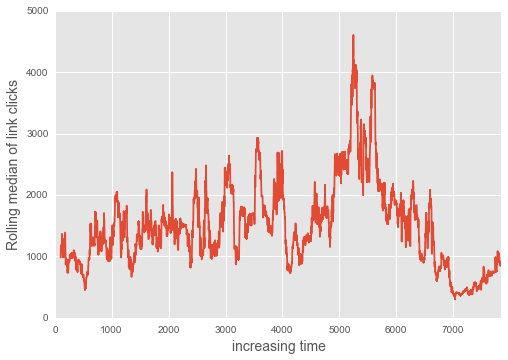

In [5]:
#Reverse data to get proper time series
data_pd_format.reindex(index=data_pd_format.index[::-1]);
pd.rolling_median(data_pd_format.link_clicks,100).plot()
plt.ylabel('Rolling median of link clicks',fontsize = 14)
plt.xlabel('increasing time',fontsize = 14)

We will now take a closer look at the time features. First, we use groupby operations to calculate the grouped medians

In [7]:
day_analysis = data_pd_format.groupby(['daynumber'])['link_clicks'].median()
hour_analysis = data_pd_format.groupby(['hour'])['link_clicks'].median()
monthyear_analysis = data_pd_format.groupby(['monthyear'])['link_clicks'].median()

## Day of week

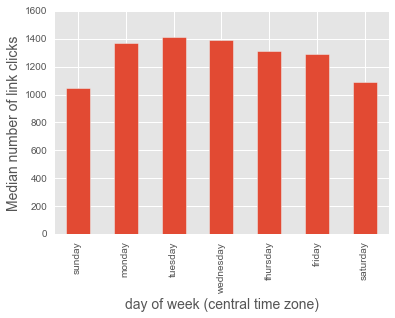

In [57]:
day_analysis.plot(kind = 'bar')

plt.xlabel( 'day of week (central time zone)',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
plt.xticks(np.arange(7), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'))
plt.savefig('day.png', bbox_inches='tight')

## Hour of day

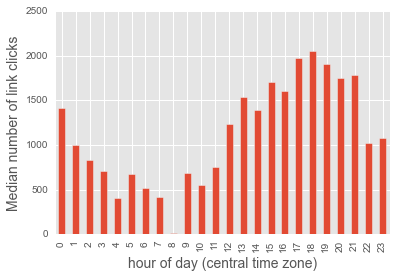

In [58]:
hour_analysis.plot(kind = 'bar')
plt.xlabel( 'hour of day (central time zone)',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
plt.savefig('hour.png', bbox_inches='tight')

## Month and year

We can see that December 2014 (122014) and January 2015 (12015) have the most number of median clicks

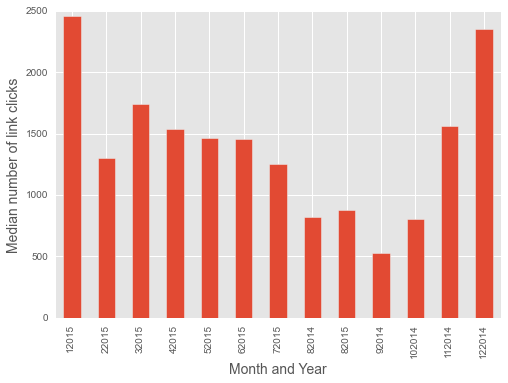

In [8]:
monthyear_analysis.plot(kind = 'bar')
plt.xlabel( 'Month and Year',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
#plt.ylim(0,1000)
#plt.xticks(np.arange(7), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'))
plt.savefig('monthyear.png', bbox_inches='tight')

# Deeper text analysis 

 - Word count
 - ALL CAPS
 - Keywords relating to 
   - women 
   - sex
   - video
   - majorcrime
   - minorcrime
   - Number
   - Politics
   - City

More text analysis. 
Group_by for word count, ALLCAPS

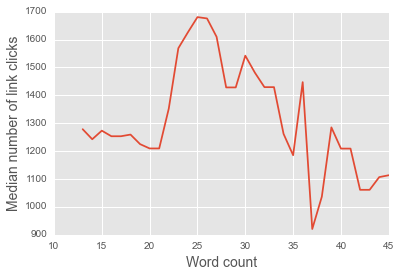

In [60]:
data_pd_format['word_count_buckets'] = pd.qcut(data_pd_format.word_count,10)
grouped = data_pd_format.groupby(['word_count'])
word_count_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
#word_count_analysis.plot(kind = 'bar')

word_count_analysis = pd.DataFrame(word_count_analysis)
#if there are fewer than 30 posts with a particular word_count we can't really make conclusions based on that
word_count_analysis = word_count_analysis[word_count_analysis.number > 50]

pd.rolling_median(word_count_analysis.median_link_clicks,4).plot()
plt.xlabel( 'Word count',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
word_count_analysis
plt.savefig('word_count.png')

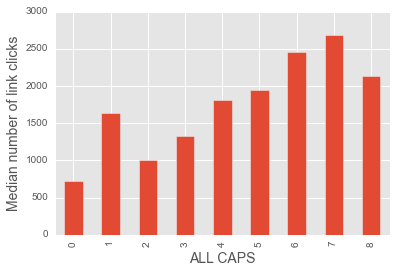

In [63]:
grouped = data_pd_format.groupby(['ALLCAPS'])
ALLCAPS_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
ALLCAPS_analysis = ALLCAPS_analysis[ALLCAPS_analysis.number > 40 ]
ALLCAPS_analysis.median_link_clicks.plot(kind = 'bar')
plt.xlabel( 'ALL CAPS',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
plt.savefig('ALLCAPS.png')

,median_link_clicks,number
women,,
0,964.0,5035
1,1735.0,1620
2,3094.5,615
3,4029.0,190
4,6265.5,65


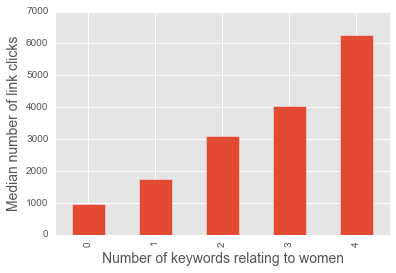

In [65]:
grouped = data_pd_format.groupby(['women'])
women_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
women_analysis = women_analysis[women_analysis.number > 40 ]
women_analysis.median_link_clicks.plot(kind = 'bar')
plt.xlabel( 'Number of keywords relating to women',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
plt.savefig('keyword_women.png')
women_analysis

,median_link_clicks,number
sex,,
0,1283,7325
1,1753,181
2,2705,51


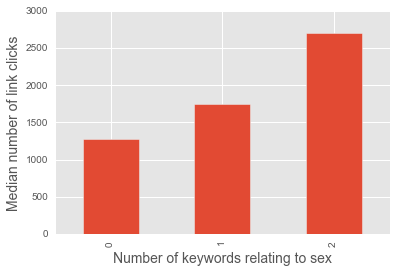

In [69]:
grouped = data_pd_format.groupby(['sex'])
sex_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
sex_analysis = sex_analysis[sex_analysis.number > 40 ]
sex_analysis.median_link_clicks.plot(kind = 'bar')
plt.xlabel( 'Number of keywords relating to sex',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
plt.savefig('keyword_sex.png')
sex_analysis

,median_link_clicks,number
video,,
0,1250.5,7128
1,1973.0,366
2,4032.0,59


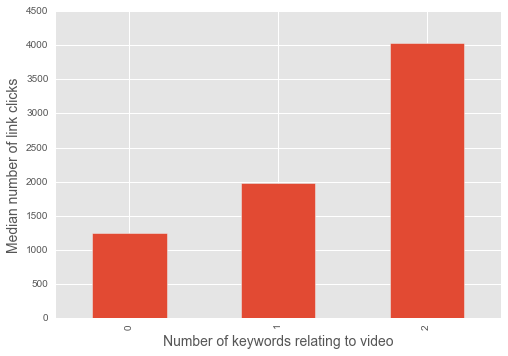

In [9]:
grouped = data_pd_format.groupby(['video'])
video_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
video_analysis = video_analysis[video_analysis.number > 40 ]
video_analysis.median_link_clicks.plot(kind = 'bar')
plt.xlabel( 'Number of keywords relating to video',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
plt.savefig('keyword_video.png')
video_analysis

,median_link_clicks,number
majorcrime,,
0,1002,4518
1,1598,1710
2,1900,864
3,2888,328
4,1980,101


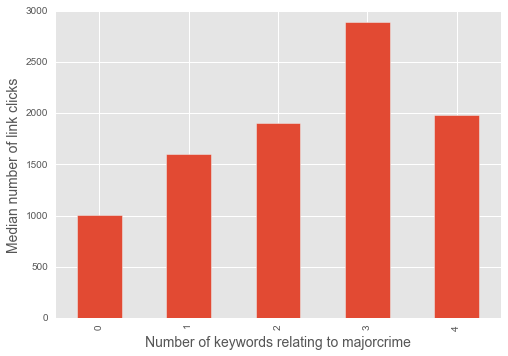

In [10]:
grouped = data_pd_format.groupby(['majorcrime'])
majorcrime_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
majorcrime_analysis = majorcrime_analysis[majorcrime_analysis.number > 40 ]
majorcrime_analysis.median_link_clicks.plot(kind = 'bar')
plt.xlabel( 'Number of keywords relating to majorcrime',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
majorcrime_analysis


,median_link_clicks,number
minorcrime,,
0,1204,6641
1,1953,757
2,2370,136


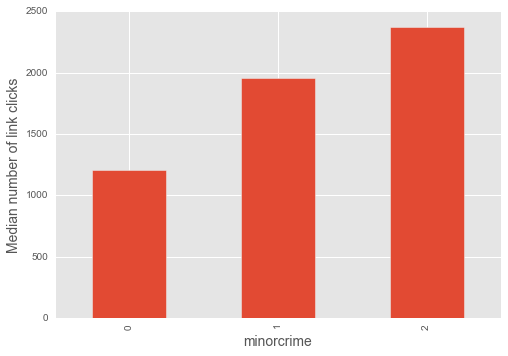

In [11]:
grouped = data_pd_format.groupby(['minorcrime'])
minorcrime_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
minorcrime_analysis = minorcrime_analysis[minorcrime_analysis.number > 40 ]
plt.xlabel( 'Number of keywords relating to minorcrime',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
minorcrime_analysis.median_link_clicks.plot(kind = 'bar')
minorcrime_analysis

,median_link_clicks,number
year,,
0,1174.5,6226
1,1899.0,1204
2,2287.0,123


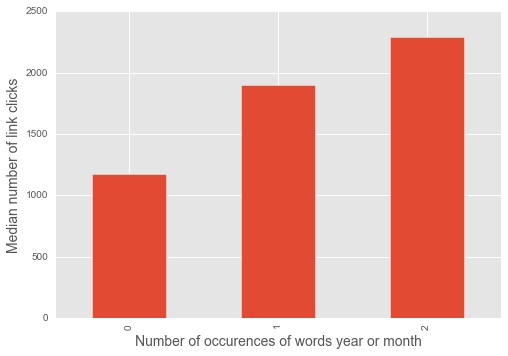

In [12]:
grouped = data_pd_format.groupby(['year'])
year_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
year_analysis = year_analysis[year_analysis.number > 40 ]
year_analysis.median_link_clicks.plot(kind = 'bar')
plt.xlabel( 'Number of occurences of words year or month',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
year_analysis

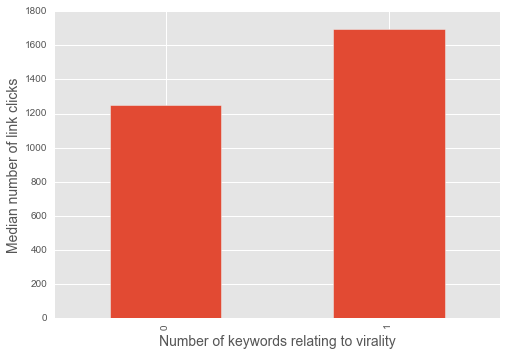

In [13]:
grouped = data_pd_format.groupby(['viral'])
viral_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
viral_analysis = viral_analysis[viral_analysis.number > 40 ]
viral_analysis.median_link_clicks.plot(kind = 'bar')
viral_analysis
plt.xlabel( 'Number of keywords relating to virality',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)

,median_link_clicks,number
number,,
0,1577.0,4346
1,2456.0,398
2,1448.0,933
3,896.0,436
4,467.0,611
5,842.0,276
6,524.5,254
7,335.0,90
8,287.0,74


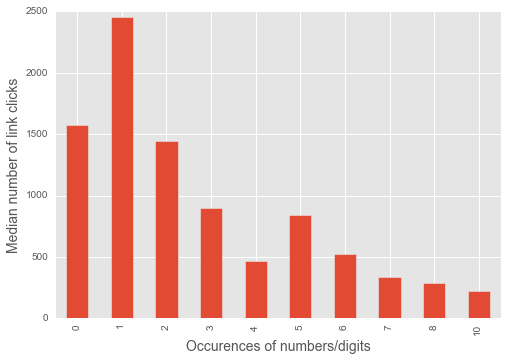

In [14]:
grouped = data_pd_format.groupby(['number'])
number_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
number_analysis = number_analysis[number_analysis.number > 40]
number_analysis.median_link_clicks.plot(kind = 'bar')
plt.xlabel( 'Occurences of numbers/digits',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
number_analysis

,median_link_clicks,number
politics,,
0,1319,7399
1,557,138


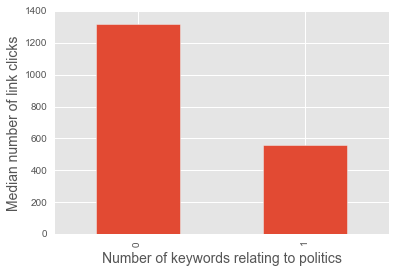

In [67]:
grouped = data_pd_format.groupby(['politics'])
politics_analysis = grouped['link_clicks'].agg({'number':np.count_nonzero,'median_link_clicks':np.median})
politics_analysis = politics_analysis[politics_analysis.number > 40 ]
politics_analysis.median_link_clicks.plot(kind = 'bar')
plt.xlabel( 'Number of keywords relating to politics',fontsize = 14)
plt.ylabel('Median number of link clicks',fontsize = 14)
plt.savefig('keyword_politics.png')
politics_analysis

# Topics

Let us first load the full data set with all the features including topic

In [23]:
full_data = pd.read_csv('../clean_data/pix_full_data_with_topics_features.csv')

We know that LDA gives each post as a mixture of topics ie., each topic $i$ has a particular weight $w_{ij}$ for each post $j$

We get the mean weighted click score for each topic using the formula

$Score(topic\, i) = \frac{1}{TotalPosts}\Sigma_{j = 1}^{TotalPosts} w_{ij} \times link clicks(j)$ 

In [24]:
score_list = []
numtopics = 8
for i in np.arange(numtopics):
    name = 'topic' + str(i+1) 
    score = 0
    score = score + np.mean(full_data[name]*full_data['link_clicks'])
    score_list.append([name,score]) 

In [25]:
score_list = pd.DataFrame(score_list, columns=['topic','score'])
score_list

,topic,score
0,topic1,19062.636506
1,topic2,10074.466198
2,topic3,6604.338832
3,topic4,3780.001052
4,topic5,5658.458034
5,topic6,6666.426633
6,topic7,7051.746584
7,topic8,4435.782941


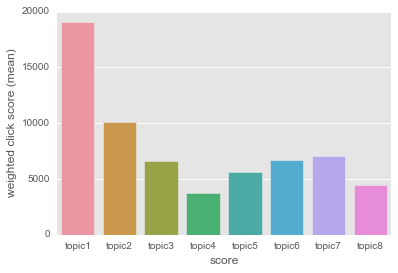

In [27]:
%run ../import.py
#rc={'font.size': 16, 'axes.labelsize': 16, 'legend.fontsize': 16.0, 
#    'axes.titlesize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
#sns.set(rc=rc)
#sns.plotting_context()
snsplot = sns.barplot(y='score',x='topic',data=score_list)
plt.xlabel('score')
plt.ylabel('weighted click score (mean)')
plt.yticks(rotation=0)
plt.savefig('weighted_click_score.png')

In [272]:
score_list

,score
0,19062.636506
1,10074.466198
2,6604.338832
3,3780.001052
4,5658.458034
5,6666.426633
6,7051.746584
7,4435.782941


In [40]:
newstory =full_data.ix[3822,['topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8']]

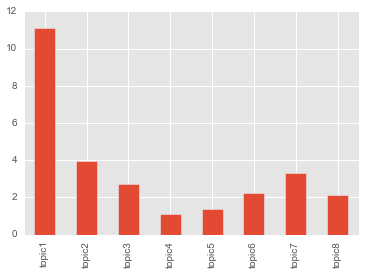

In [51]:
newstory.plot(kind = 'bar')
plt.savefig('brooklyn_plot.png')